# Data Model Implementation (25 points)
## THIS VERSION OF THE DATASET DOES HAVE EVCAR2B, so the dataset is smaller because of skip logic.
#There is a Jupyter notebook that thoroughly describes the data extraction, cleaning, and 
#transformation process, and the cleaned data is exported as CSV files for the machine learning model. (10 points)

#A Python script initializes, trains, and evaluates a model or loads a pretrained model. (10 points)

#The model demonstrates meaningful predictive power at least 75% classification accuracy or 0.80 R-squared. (5 points)



In [1]:
#Setup dependencies, create encoder instances, and save Raw (initial) DataFrame as a .csv file
  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False) 

path = "/Users/kim/Desktop/Project-2/Data/ATP W108.xlsx"
df = pd.read_excel(path)
df

#Write the Raw DataFrame to a .csv file
df.to_csv('ATP_108_Raw_csv', index=False)

In [2]:
column_list = df.columns.tolist()
column_list

['QKEY',
 'INTERVIEW_START_W108',
 'INTERVIEW_END_W108',
 'DEVICE_TYPE_W108',
 'LANG_W108',
 'FORM_W108',
 'XKNOWPAT_W108',
 'ENV2_a_W108',
 'ENV2_b_W108',
 'ENV2_c_W108',
 'ENV2_d_W108',
 'ENV2_e_W108',
 'ENV2_f_W108',
 'ENKNOW1_W108',
 'ENKNOW2_W108',
 'EN1_W108',
 'GASXPORT1_W108',
 'GASXPORT2_a_W108',
 'GASXPORT2_b_W108',
 'GASXPORT2_c_W108',
 'EVCAR2_W108',
 'EVCAR2B_a_W108',
 'EVCAR2B_b_W108',
 'EVCAR2B_c_W108',
 'EVCAR3_W108',
 'EVCAR1_W108',
 'LAWCOST_W108',
 'ENVIR8_a_W108',
 'ENVIR8_b_W108',
 'ENVIR8_c_W108',
 'ENVIR8_d_W108',
 'ENVIR8_e_W108',
 'LOCENV_a_W108',
 'LOCENV_b_W108',
 'LOCENV_c_W108',
 'LOCENV_d_W108',
 'LOCENV_e_W108',
 'ENVRMPCT_a_W108',
 'ENVRMPCT_b_W108',
 'ENVRMPCT_c_W108',
 'ENVRMPCT_d_W108',
 'ENVRMPCT_e_W108',
 'CCXTRW1_a_W108',
 'CCXTRW1_b_W108',
 'CCXTRW1_c_W108',
 'CCXTRW1_d_W108',
 'CCXTRW1_e_W108',
 'CCPOLICY_a_W108',
 'CCPOLICY_b_W108',
 'CCPOLICY_c_W108',
 'CCPOLICY_d_W108',
 'CCPOLICY_e_W108',
 'BIDENC4_W108',
 'BIDENC5_W108',
 'COVIDEGFP_a_W108',

In [3]:
#Create Original DF (pandas version) of columns to be used for analyses but from the Raw DF.  Then, save as a CSV.

EV_df_original_1A = df[[
    'QKEY',
    'ENV2_a_W108', 
    'ENV2_b_W108',
    'ENV2_d_W108', 
    'ENV2_f_W108',
    'EN1_W108', 
    'EVCAR2_W108', 
    'EVCAR2B_a_W108', 
    'EVCAR2B_b_W108', 
    'EVCAR2B_c_W108', 
    'EVCAR3_W108', 
    'EVCAR1_W108',
    'ENVIR8_a_W108',
    'ENVIR8_e_W108',
    'LOCENV_a_W108',
    'LOCENV_d_W108',
    'LOCENV_e_W108',
    'ENVRMPCT_a_W108',
    'ENVRMPCT_b_W108',
    'ENVRMPCT_c_W108',
    'ENVRMPCT_d_W108',
    'ENVRMPCT_e_W108',
    'CCPOLICY_e_W108',
    'RSTCWRK_a_W108',
    'RSTCWRK_b_W108',
    'RSTCWRK_c_W108',
    'RSTCWRK_d_W108',
    'RSTCWRK_e_W108',
    'COVID_INFECT_a_W108',
    'COVID_INFECT_b_W108',
    'GAP21Q12_W108',
    'F_MARITAL',
    'F_METRO',
    'F_CREGION',
    'F_AGECAT',
    'F_GENDER',
    'F_EDUCCAT',
    'F_RACETHNMOD',
    'F_PARTYSUM_FINAL',
    'F_INC_SDT1',
    'F_IDEO',
    'F_INTFREQ',
]]

EV_df_original_1B = pd.DataFrame(EV_df_original_1A)
EV_df_original_1B.to_csv('ATP_108_Original_csv', index=False)
EV_df_original_1B.to_excel('ATP_108_Original.xlsx', index=False)

In [4]:
#View properties of the dataframe
EV_df_original_1B.info()
EV_df_original_1B.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 10282 non-null  int64  
 1   ENV2_a_W108          10282 non-null  int64  
 2   ENV2_b_W108          10282 non-null  int64  
 3   ENV2_d_W108          10282 non-null  int64  
 4   ENV2_f_W108          10282 non-null  int64  
 5   EN1_W108             10282 non-null  int64  
 6   EVCAR2_W108          10282 non-null  int64  
 7   EVCAR2B_a_W108       4481 non-null   float64
 8   EVCAR2B_b_W108       4481 non-null   float64
 9   EVCAR2B_c_W108       4481 non-null   float64
 10  EVCAR3_W108          10282 non-null  int64  
 11  EVCAR1_W108          10282 non-null  int64  
 12  ENVIR8_a_W108        10282 non-null  int64  
 13  ENVIR8_e_W108        10282 non-null  int64  
 14  LOCENV_a_W108        10282 non-null  int64  
 15  LOCENV_d_W108        10282 non-null 

,QKEY,ENV2_a_W108,ENV2_b_W108,ENV2_d_W108,ENV2_f_W108,EN1_W108,EVCAR2_W108,EVCAR2B_a_W108,EVCAR2B_b_W108,EVCAR2B_c_W108,...,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_RACETHNMOD,F_PARTYSUM_FINAL,F_INC_SDT1,F_IDEO,F_INTFREQ
0,100260,1,1,2,2,2,2,2.0,3.0,1.0,...,1,4,4,1,1,1,1,4,1,2.0
1,100314,2,1,1,1,1,2,2.0,2.0,2.0,...,2,2,4,1,2,1,1,3,4,2.0
2,100363,1,1,1,1,1,2,2.0,3.0,2.0,...,1,1,2,2,1,1,2,9,3,2.0
3,100598,2,2,1,1,1,2,1.0,1.0,3.0,...,1,4,3,2,1,1,1,9,2,2.0
4,100637,1,1,1,1,2,3,NaN,NaN,NaN,...,1,3,4,2,2,1,1,2,1,5.0


# DATA CLEANING AND PREPARATION

In [5]:
#Check for duplicate respondents.  None were found.

duplicates = EV_df_original_1B['QKEY'].duplicated()
print(EV_df_original_1B[EV_df_original_1B['QKEY'].duplicated()])


Empty DataFrame
Columns: [QKEY, ENV2_a_W108, ENV2_b_W108, ENV2_d_W108, ENV2_f_W108, EN1_W108, EVCAR2_W108, EVCAR2B_a_W108, EVCAR2B_b_W108, EVCAR2B_c_W108, EVCAR3_W108, EVCAR1_W108, ENVIR8_a_W108, ENVIR8_e_W108, LOCENV_a_W108, LOCENV_d_W108, LOCENV_e_W108, ENVRMPCT_a_W108, ENVRMPCT_b_W108, ENVRMPCT_c_W108, ENVRMPCT_d_W108, ENVRMPCT_e_W108, CCPOLICY_e_W108, RSTCWRK_a_W108, RSTCWRK_b_W108, RSTCWRK_c_W108, RSTCWRK_d_W108, RSTCWRK_e_W108, COVID_INFECT_a_W108, COVID_INFECT_b_W108, GAP21Q12_W108, F_MARITAL, F_METRO, F_CREGION, F_AGECAT, F_GENDER, F_EDUCCAT, F_RACETHNMOD, F_PARTYSUM_FINAL, F_INC_SDT1, F_IDEO, F_INTFREQ]
Index: []

[0 rows x 42 columns]


In [6]:
#For 1B dataframe, drop all 99s (first converted to nulls).  Also, drop all other missing data.
EV_df_original_1B[:] = np.where(EV_df_original_1B == 99, np.nan, EV_df_original_1B)
EV_df_original_1B.dropna(inplace = True)
EV_df_original_1B.reset_index()
EV_df_original_1B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 0 to 10279
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3927 non-null   int64  
 1   ENV2_a_W108          3927 non-null   float64
 2   ENV2_b_W108          3927 non-null   float64
 3   ENV2_d_W108          3927 non-null   float64
 4   ENV2_f_W108          3927 non-null   float64
 5   EN1_W108             3927 non-null   float64
 6   EVCAR2_W108          3927 non-null   float64
 7   EVCAR2B_a_W108       3927 non-null   float64
 8   EVCAR2B_b_W108       3927 non-null   float64
 9   EVCAR2B_c_W108       3927 non-null   float64
 10  EVCAR3_W108          3927 non-null   float64
 11  EVCAR1_W108          3927 non-null   float64
 12  ENVIR8_a_W108        3927 non-null   float64
 13  ENVIR8_e_W108        3927 non-null   float64
 14  LOCENV_a_W108        3927 non-null   float64
 15  LOCENV_d_W108        3927 non-null   float

In [7]:
#Recode PARTYSUM_FINAL: Take out 9, DK/Refused/No lean
EV_df_original_1B.drop(EV_df_original_1B[EV_df_original_1B['F_PARTYSUM_FINAL'] == 9].index, inplace=True)

#GENDER (Female=1, Male=0; In some other way=3)
EV_df_original_1B.drop(EV_df_original_1B[EV_df_original_1B['F_GENDER'] == 3].index, inplace=True)

In [8]:
#Recode 1s and 2s to 0s and 1s for this feature
EV_df_original_1B['EN1_W108'] = EV_df_original_1B['EN1_W108'].replace([1, 2], [0, 1])

In [9]:
#Recode features with Favor and Oppose responses so Favor =1 and Oppose=0
EV_df_original_1B[['ENV2_a_W108','ENV2_b_W108', 'ENV2_d_W108', 'ENV2_f_W108','EVCAR3_W108', 'CCPOLICY_e_W108']] = EV_df_original_1B[['ENV2_a_W108','ENV2_b_W108', 'ENV2_d_W108', 'ENV2_f_W108','EVCAR3_W108', 'CCPOLICY_e_W108']].replace([2, 1], [0, 1])

EV_df_original_1B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 10279
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3853 non-null   int64  
 1   ENV2_a_W108          3853 non-null   float64
 2   ENV2_b_W108          3853 non-null   float64
 3   ENV2_d_W108          3853 non-null   float64
 4   ENV2_f_W108          3853 non-null   float64
 5   EN1_W108             3853 non-null   float64
 6   EVCAR2_W108          3853 non-null   float64
 7   EVCAR2B_a_W108       3853 non-null   float64
 8   EVCAR2B_b_W108       3853 non-null   float64
 9   EVCAR2B_c_W108       3853 non-null   float64
 10  EVCAR3_W108          3853 non-null   float64
 11  EVCAR1_W108          3853 non-null   float64
 12  ENVIR8_a_W108        3853 non-null   float64
 13  ENVIR8_e_W108        3853 non-null   float64
 14  LOCENV_a_W108        3853 non-null   float64
 15  LOCENV_d_W108        3853 non-null   float

In [10]:
#Recode features with Yes and No responses so Yes=1 and No=0; ***EVCAR1_W108 may be imbalanced***
EV_df_original_1B[['EVCAR1_W108','ENVRMPCT_a_W108','ENVRMPCT_b_W108','ENVRMPCT_c_W108','ENVRMPCT_d_W108','ENVRMPCT_e_W108']] = EV_df_original_1B[['EVCAR1_W108','ENVRMPCT_a_W108','ENVRMPCT_b_W108','ENVRMPCT_c_W108','ENVRMPCT_d_W108','ENVRMPCT_e_W108']].replace([2, 1], [0, 1])

EV_df_original_1B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 10279
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3853 non-null   int64  
 1   ENV2_a_W108          3853 non-null   float64
 2   ENV2_b_W108          3853 non-null   float64
 3   ENV2_d_W108          3853 non-null   float64
 4   ENV2_f_W108          3853 non-null   float64
 5   EN1_W108             3853 non-null   float64
 6   EVCAR2_W108          3853 non-null   float64
 7   EVCAR2B_a_W108       3853 non-null   float64
 8   EVCAR2B_b_W108       3853 non-null   float64
 9   EVCAR2B_c_W108       3853 non-null   float64
 10  EVCAR3_W108          3853 non-null   float64
 11  EVCAR1_W108          3853 non-null   float64
 12  ENVIR8_a_W108        3853 non-null   float64
 13  ENVIR8_e_W108        3853 non-null   float64
 14  LOCENV_a_W108        3853 non-null   float64
 15  LOCENV_d_W108        3853 non-null   float

In [11]:
#Recode feature with 1= "Expand alt.energy" support and 2= "Expand fossil fuels" responses so 2=0 and 1=1
EV_df_original_1B['EN1_W108'] = EV_df_original_1B['EN1_W108'].replace([2, 1], [0, 1])

EV_df_original_1B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 10279
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3853 non-null   int64  
 1   ENV2_a_W108          3853 non-null   float64
 2   ENV2_b_W108          3853 non-null   float64
 3   ENV2_d_W108          3853 non-null   float64
 4   ENV2_f_W108          3853 non-null   float64
 5   EN1_W108             3853 non-null   float64
 6   EVCAR2_W108          3853 non-null   float64
 7   EVCAR2B_a_W108       3853 non-null   float64
 8   EVCAR2B_b_W108       3853 non-null   float64
 9   EVCAR2B_c_W108       3853 non-null   float64
 10  EVCAR3_W108          3853 non-null   float64
 11  EVCAR1_W108          3853 non-null   float64
 12  ENVIR8_a_W108        3853 non-null   float64
 13  ENVIR8_e_W108        3853 non-null   float64
 14  LOCENV_a_W108        3853 non-null   float64
 15  LOCENV_d_W108        3853 non-null   float

In [12]:
#Reverse features so a higher label (i.e., most, all, very) is a higher numeric score. Converted binary features to 0 and 1 values.
#for clarity of interpretation and explanation.  We tried the OrdinalEncoding but the original scales for these features 
#not in a meaningful order, so we opted to use the replace function.  For clarity of interpretation
#and explanation, all oridinal variables/questions/items with a 0 value indicated by their label 
#in the questionnaire were recoded to reflect a 0 value. 
#Also, for EVCAR2_W108, designate 5 as missing data given 0 value will be recoded as 0 ---- not a 1
# EV_df_original_1B['EVCAR2_W108'] = EV_df_original_1B['EVCAR2_W108'].replace({1: 3, 2: 2, 3: 1, 4: 0})

EV_df_original_1B[['GAP21Q12_W108', 'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108']] = EV_df_original_1B[['GAP21Q12_W108','LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108']].replace([1, 2, 3, 4], [3, 2, 1, 0])

EV_df_original_1B['F_EDUCCAT'] = EV_df_original_1B['F_EDUCCAT'].replace([1, 2, 3], [3, 2, 1])

EV_df_original_1B[['EVCAR2B_a_W108','EVCAR2B_b_W108','EVCAR2B_c_W108']] = EV_df_original_1B[['EVCAR2B_a_W108','EVCAR2B_b_W108','EVCAR2B_c_W108']].replace([1, 2, 3], [2, 1, 0])

EV_df_original_1B[['COVID_INFECT_a_W108', 'COVID_INFECT_b_W108']] = EV_df_original_1B[['COVID_INFECT_a_W108', 'COVID_INFECT_b_W108']].replace([1, 2, 3, 4], [3, 2, 1, 0])

EV_df_original_1B[['RSTCWRK_a_W108','RSTCWRK_b_W108', 'RSTCWRK_c_W108', 'RSTCWRK_d_W108', 'RSTCWRK_e_W108']] = EV_df_original_1B[['RSTCWRK_a_W108','RSTCWRK_b_W108', 'RSTCWRK_c_W108', 'RSTCWRK_d_W108', 'RSTCWRK_e_W108']].replace([1, 2, 3, 4, 5], [4, 3, 2, 1, 0])

EV_df_original_1B['F_INTFREQ'] = EV_df_original_1B['F_INTFREQ'].replace([5, 4, 3, 2, 1], [1, 2, 3, 4, 5])

EV_df_original_1B[['ENVIR8_a_W108','ENVIR8_e_W108']] = EV_df_original_1B[['ENVIR8_a_W108','ENVIR8_e_W108']].replace([1, 2, 3], [3, 1, 2])

EV_df_original_1B[['F_METRO','F_GENDER']] = EV_df_original_1B[['F_METRO','F_GENDER']].replace([1, 2], [1, 0])

EV_df_original_1B.info()

EV_df_original_1B['EVCAR2_W108'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 10279
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3853 non-null   int64  
 1   ENV2_a_W108          3853 non-null   float64
 2   ENV2_b_W108          3853 non-null   float64
 3   ENV2_d_W108          3853 non-null   float64
 4   ENV2_f_W108          3853 non-null   float64
 5   EN1_W108             3853 non-null   float64
 6   EVCAR2_W108          3853 non-null   float64
 7   EVCAR2B_a_W108       3853 non-null   float64
 8   EVCAR2B_b_W108       3853 non-null   float64
 9   EVCAR2B_c_W108       3853 non-null   float64
 10  EVCAR3_W108          3853 non-null   float64
 11  EVCAR1_W108          3853 non-null   float64
 12  ENVIR8_a_W108        3853 non-null   float64
 13  ENVIR8_e_W108        3853 non-null   float64
 14  LOCENV_a_W108        3853 non-null   float64
 15  LOCENV_d_W108        3853 non-null   float

EVCAR2_W108
2.0    2142
1.0    1711
Name: count, dtype: int64

In [13]:
#OneHotEncode(r) these features to break out nominal values and creat dummy variables.    
#List the columns to encode

# List of columns to encode
columns_to_encode = ['F_MARITAL', 'F_CREGION', 'F_RACETHNMOD']

# Fit and transform the encoder on the columns
encoded = encoder.fit_transform(EV_df_original_1B[columns_to_encode])

# Get feature names
feature_names = encoder.get_feature_names_out(columns_to_encode)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded, columns=feature_names)

# Drop the original columns from the DataFrame
EV_df_original_1B = EV_df_original_1B.drop(columns_to_encode, axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
EV_df_original_1B = pd.concat([EV_df_original_1B, encoded_df], axis=1)

EV_df_original_1B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6293 entries, 0 to 3852
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QKEY                 3853 non-null   float64
 1   ENV2_a_W108          3853 non-null   float64
 2   ENV2_b_W108          3853 non-null   float64
 3   ENV2_d_W108          3853 non-null   float64
 4   ENV2_f_W108          3853 non-null   float64
 5   EN1_W108             3853 non-null   float64
 6   EVCAR2_W108          3853 non-null   float64
 7   EVCAR2B_a_W108       3853 non-null   float64
 8   EVCAR2B_b_W108       3853 non-null   float64
 9   EVCAR2B_c_W108       3853 non-null   float64
 10  EVCAR3_W108          3853 non-null   float64
 11  EVCAR1_W108          3853 non-null   float64
 12  ENVIR8_a_W108        3853 non-null   float64
 13  ENVIR8_e_W108        3853 non-null   float64
 14  LOCENV_a_W108        3853 non-null   float64
 15  LOCENV_d_W108        3853 non-null   float6

/Users/kim/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# #Checking for outliers using boxplots

# # Create a separate boxplot for each column a for loop
# for column in df:
#     plt.figure()  # create a new figure
#     df.boxplot([column])  # create a boxplot for the current column

#     plt.title('Boxplot of ' + column)  # set the title
#     plt.ylabel('Values')  # set the y-label
#     plt.grid(True)  # add a grid


# plt.show()

/var/folders/mp/b71m9bw15b132vxrmh0r66hh0000gn/T/ipykernel_4739/1351010616.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # create a new figure


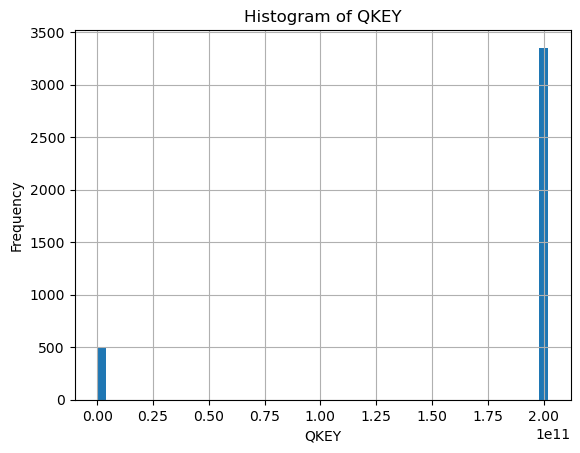

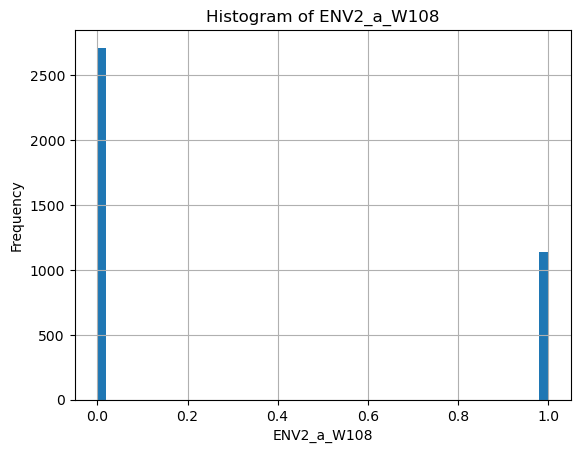

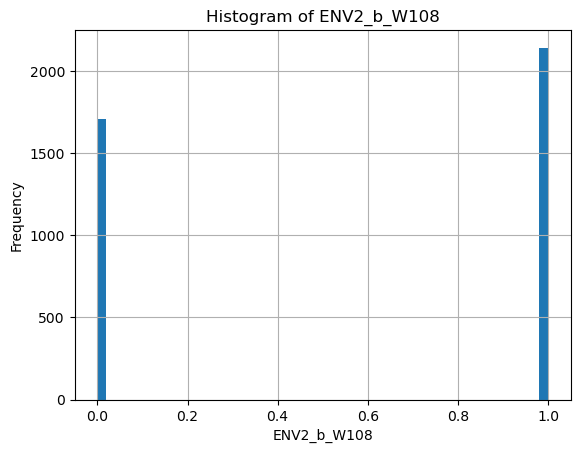

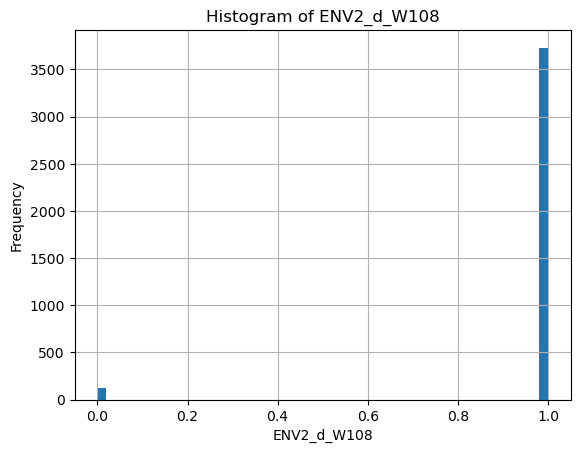

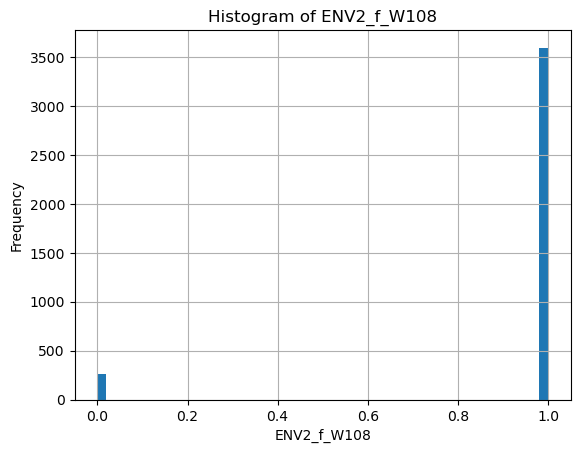

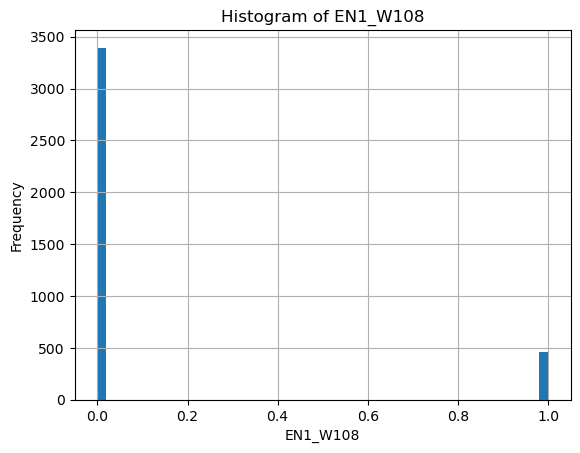

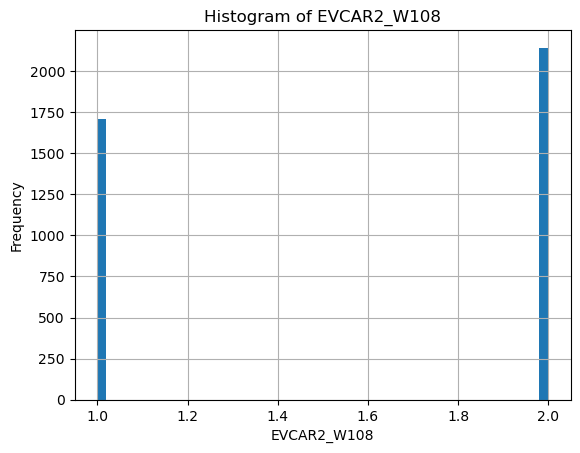

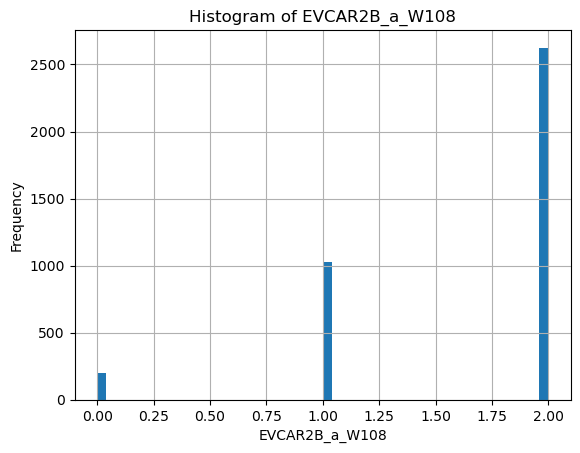

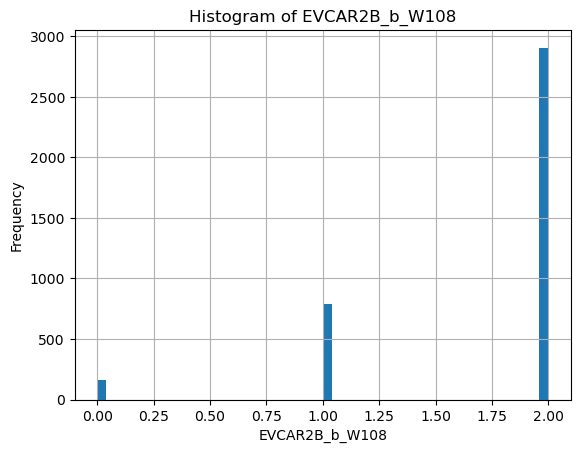

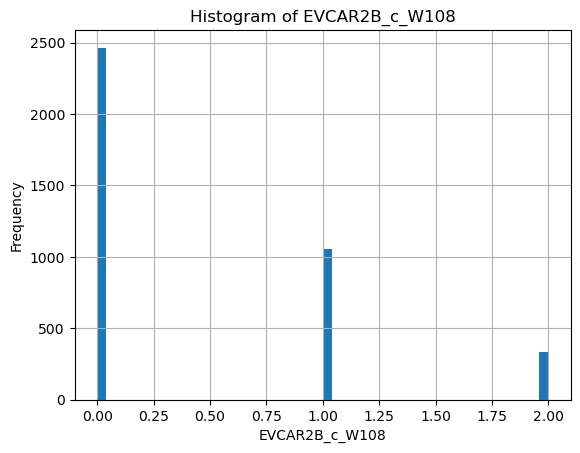

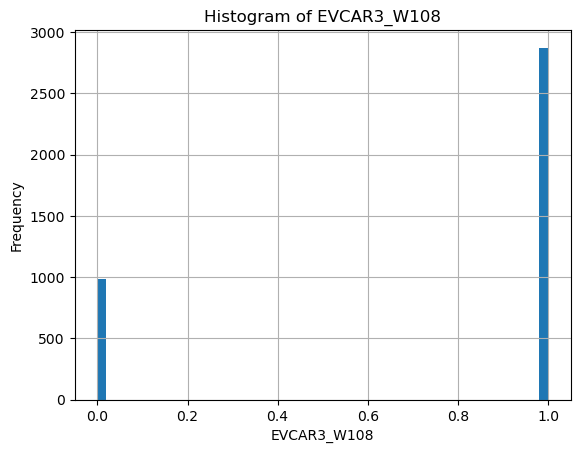

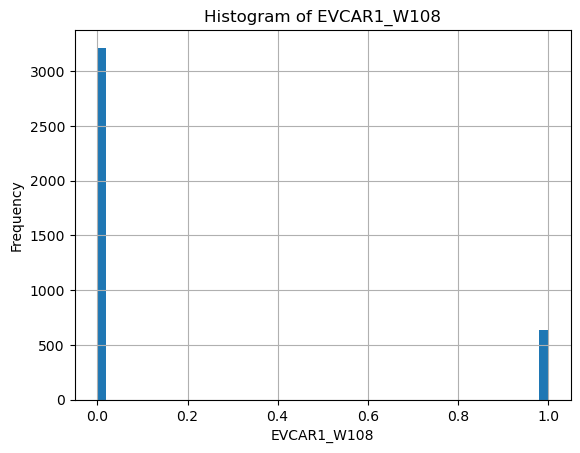

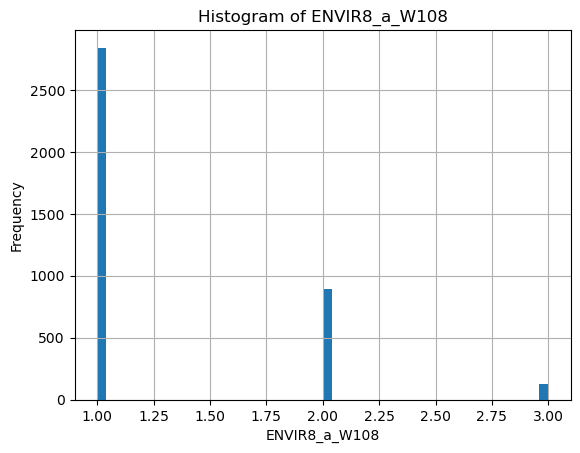

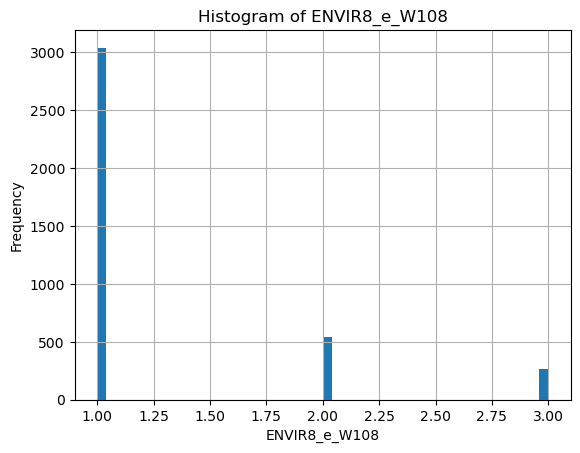

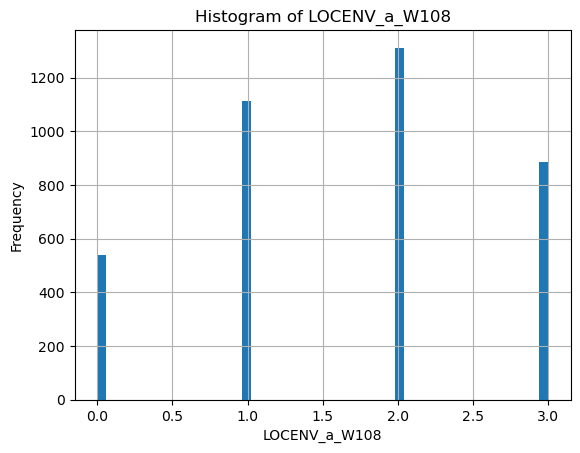

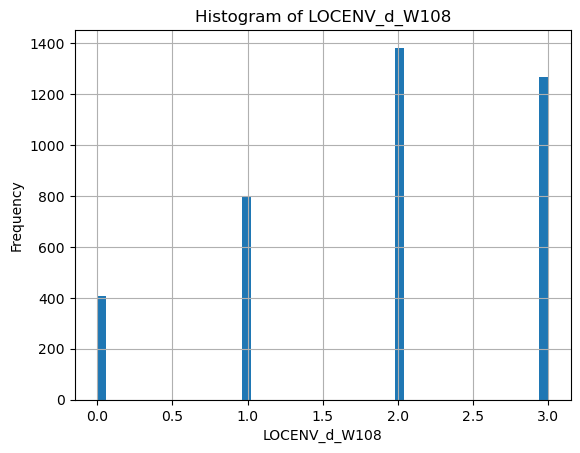

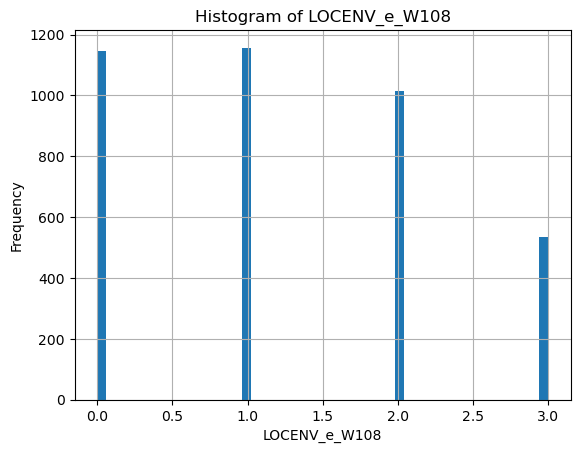

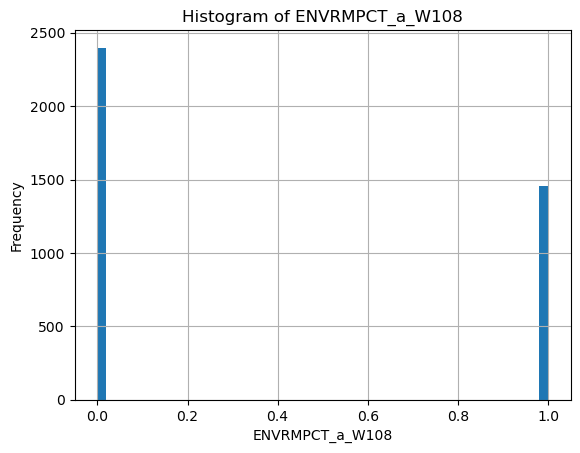

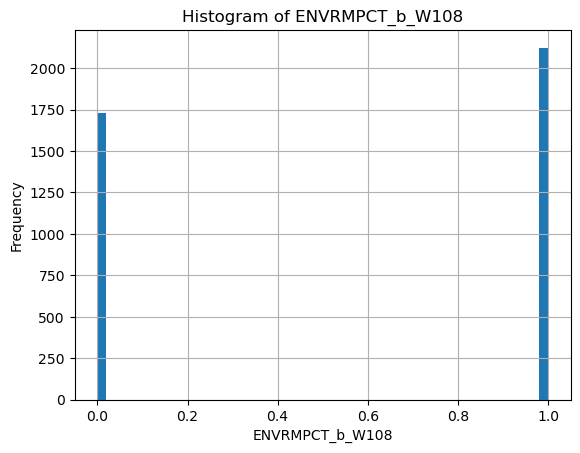

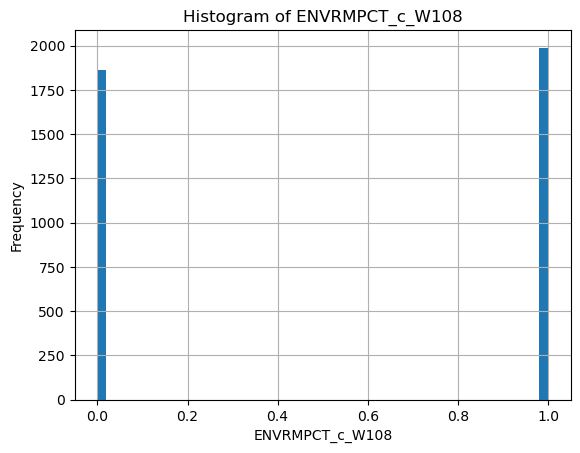

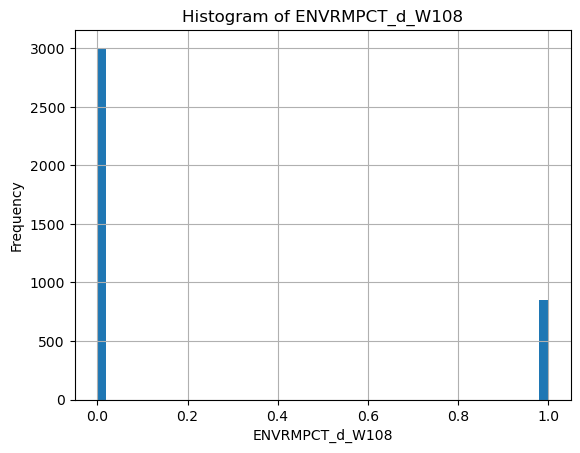

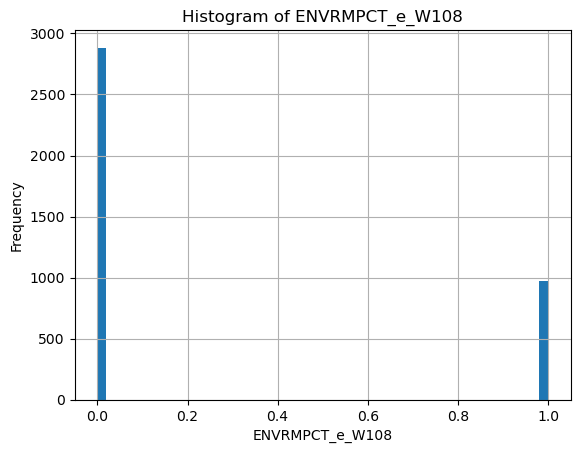

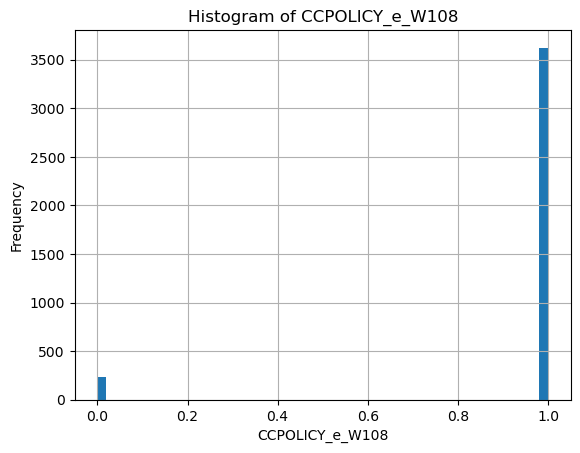

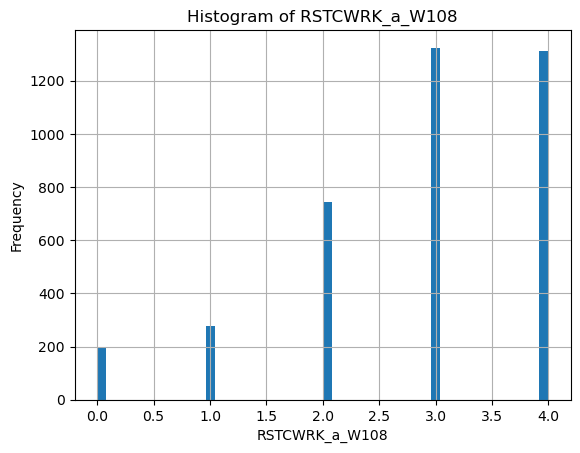

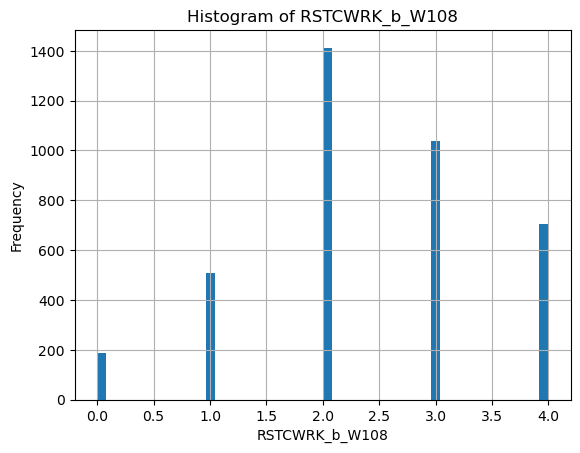

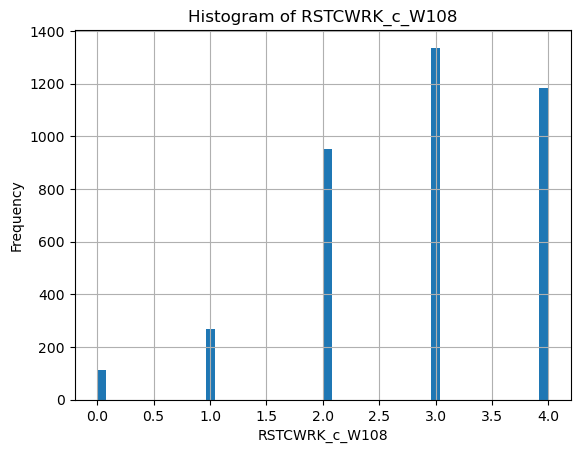

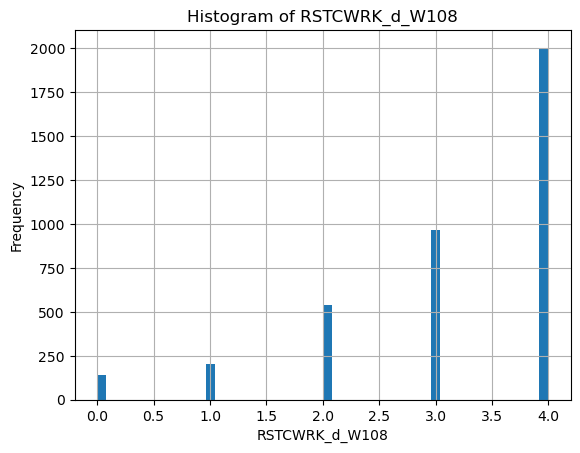

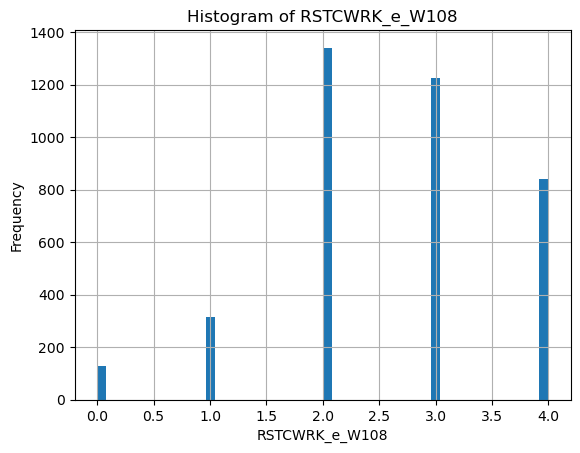

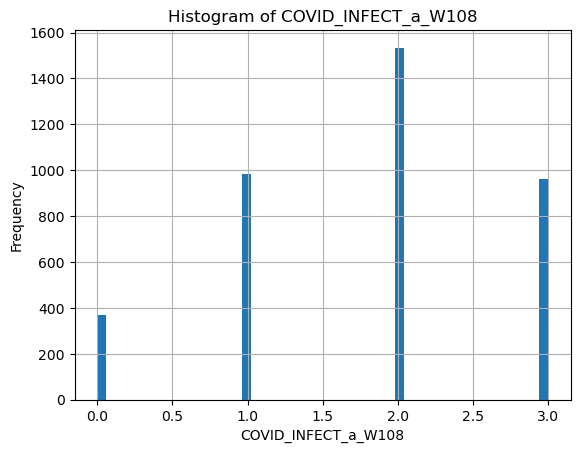

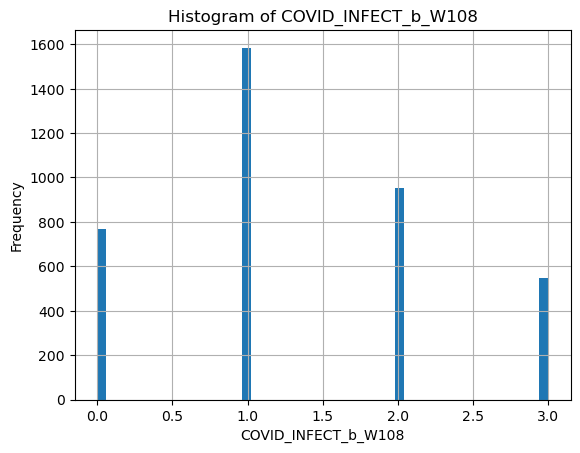

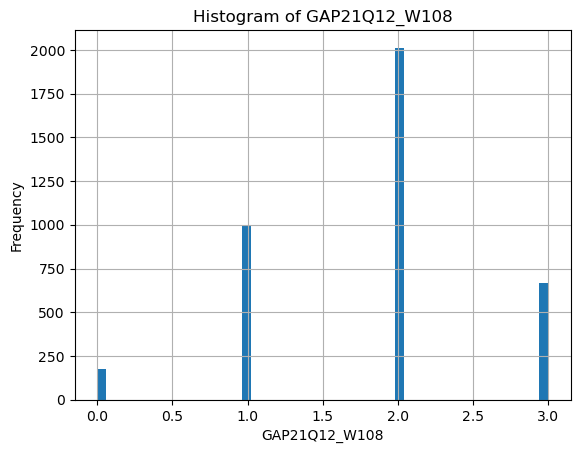

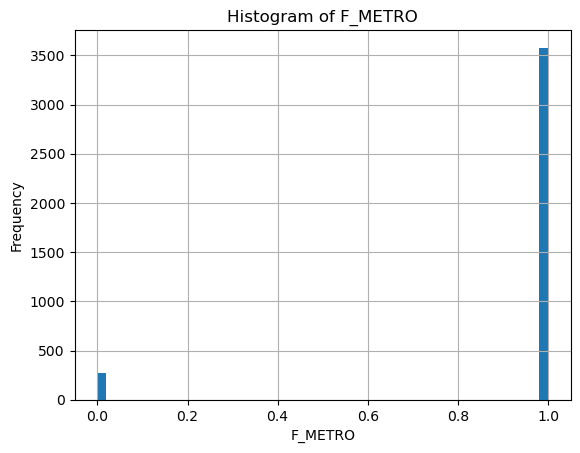

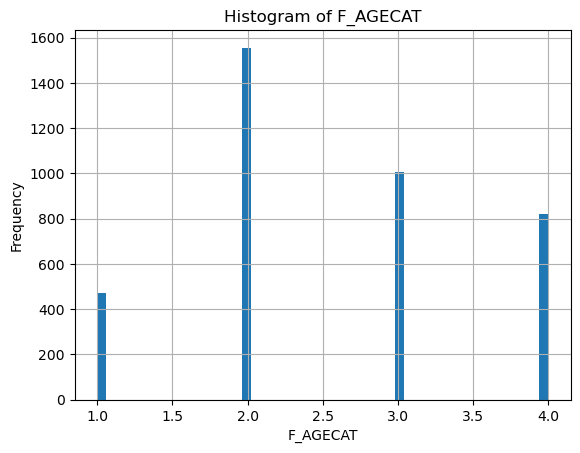

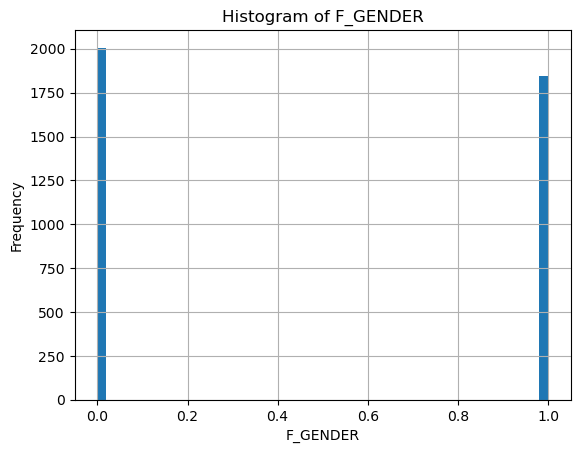

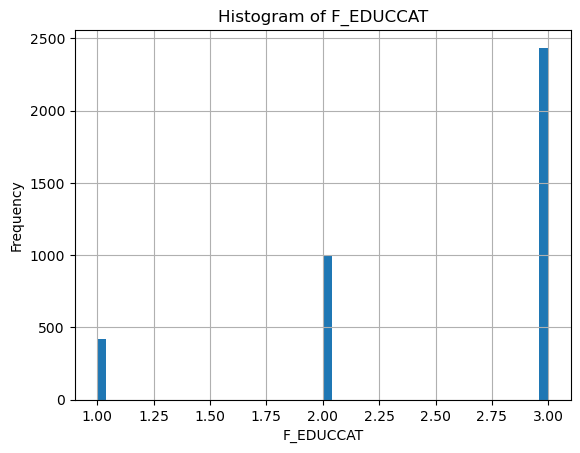

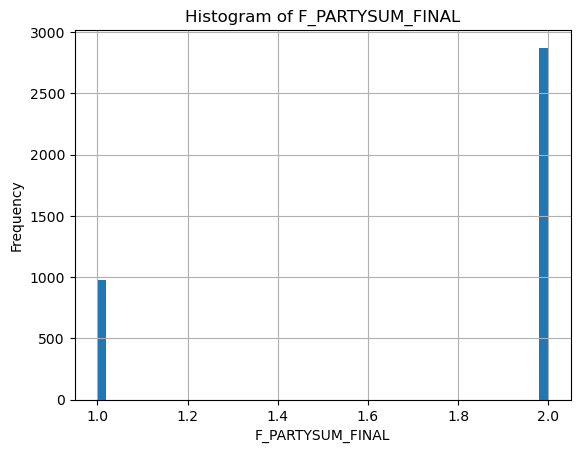

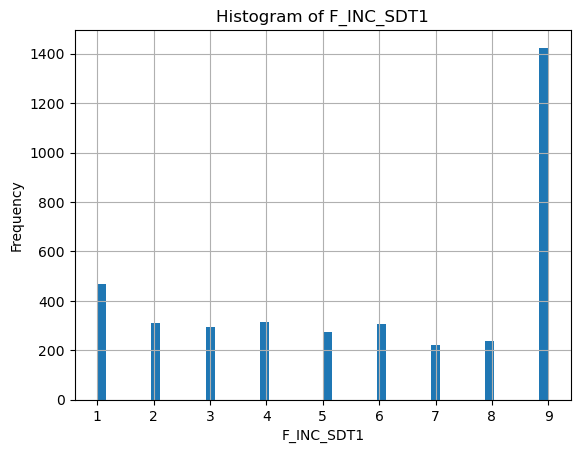

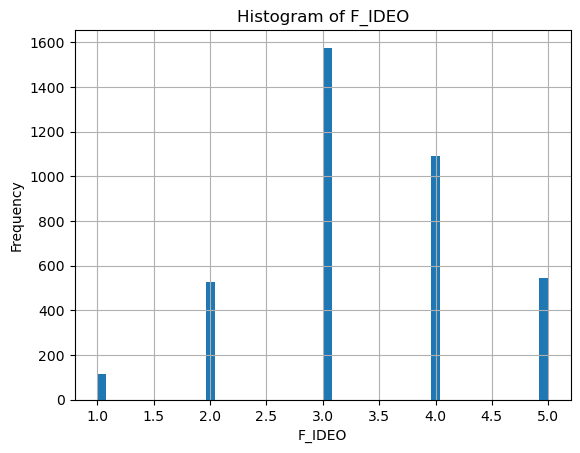

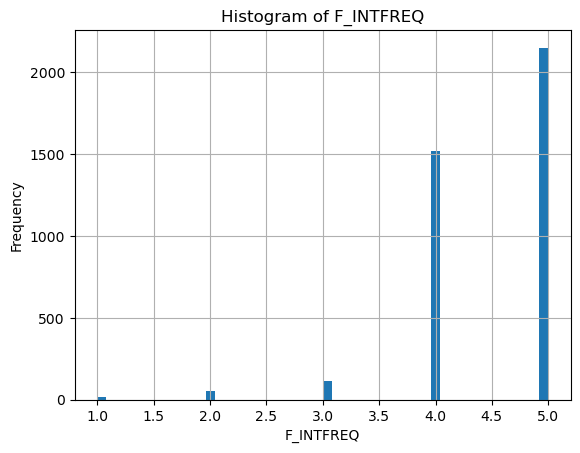

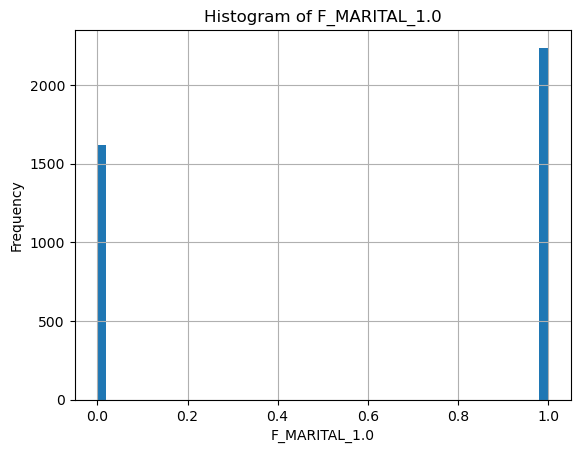

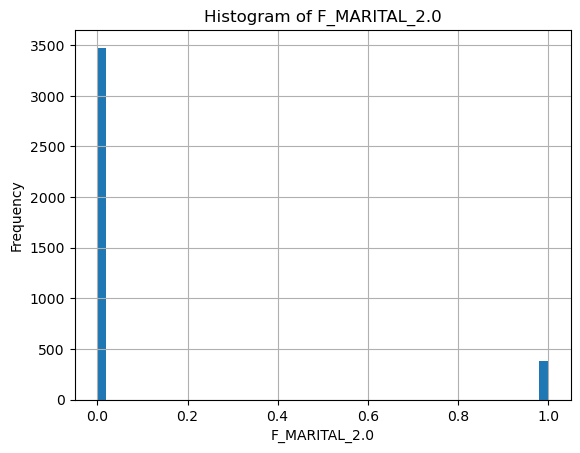

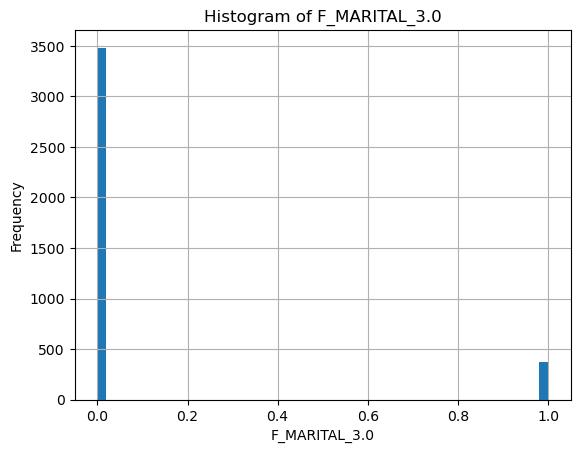

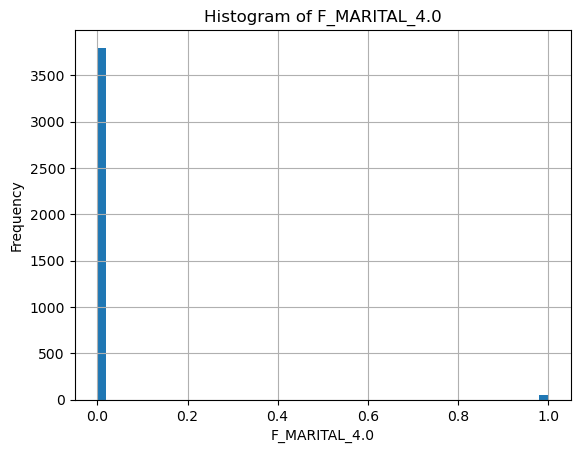

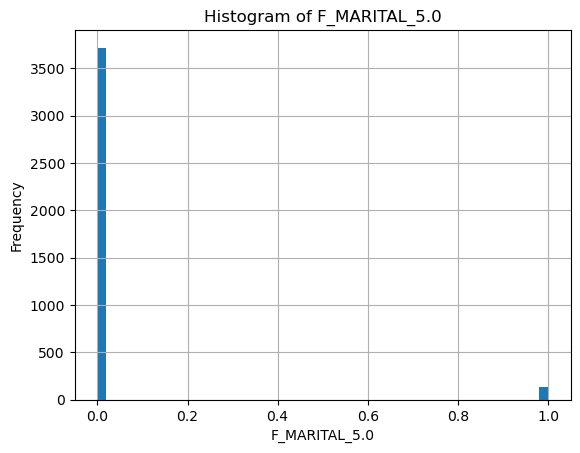

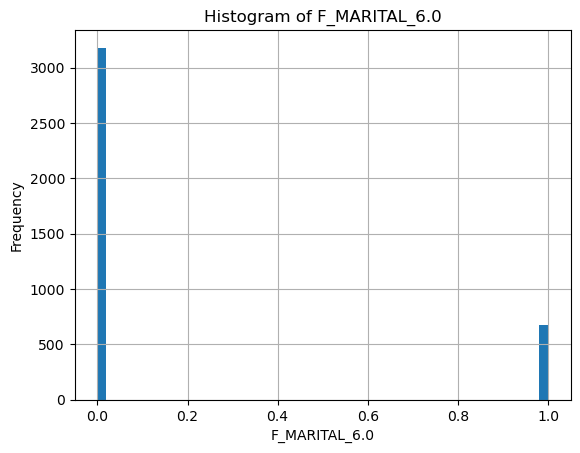

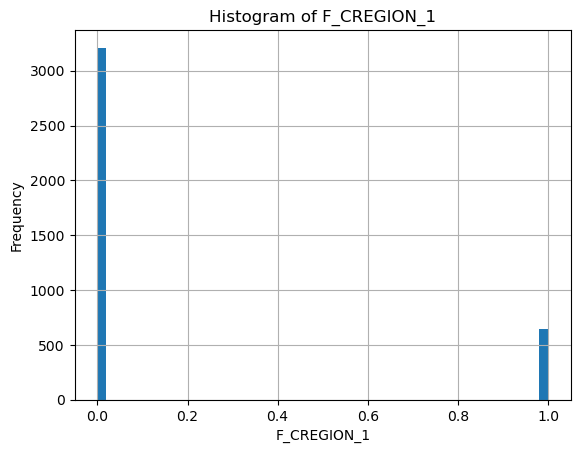

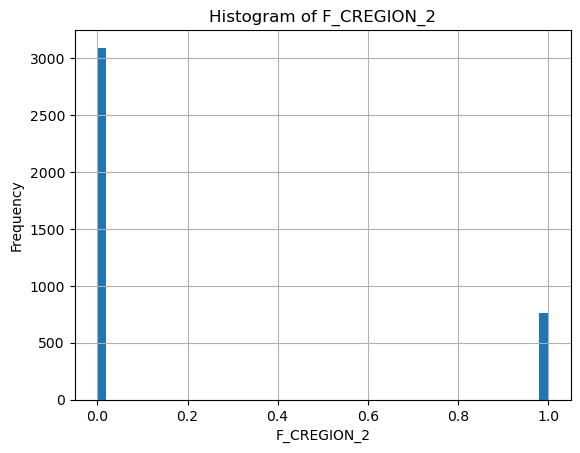

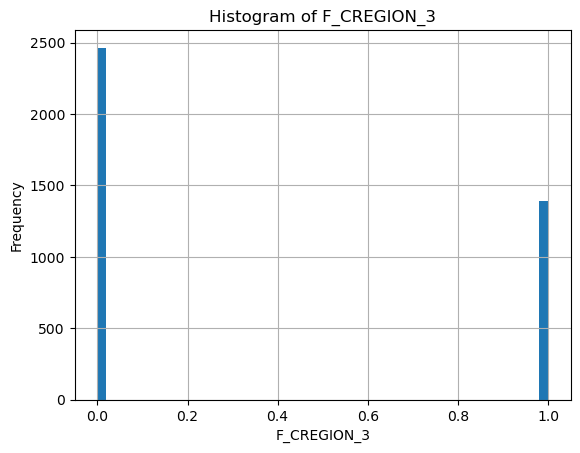

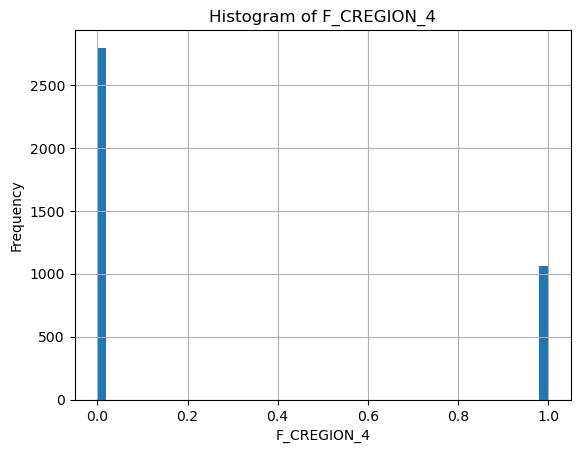

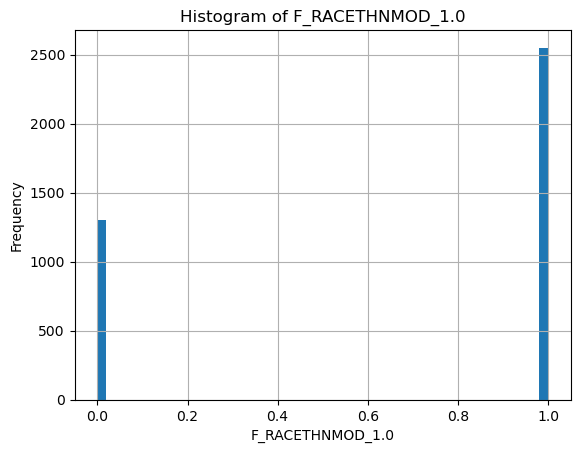

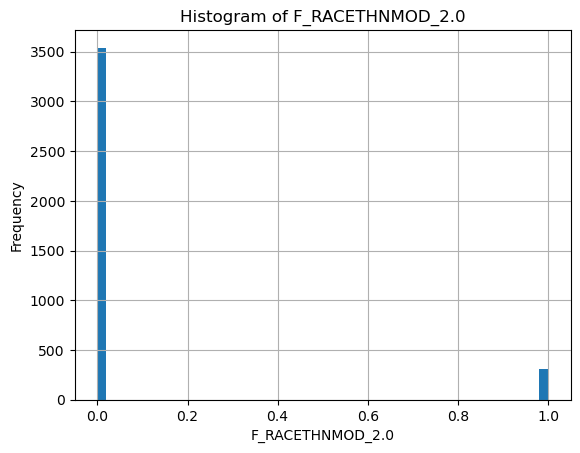

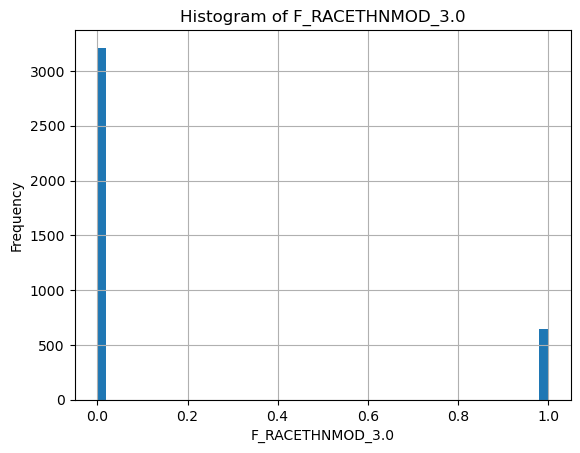

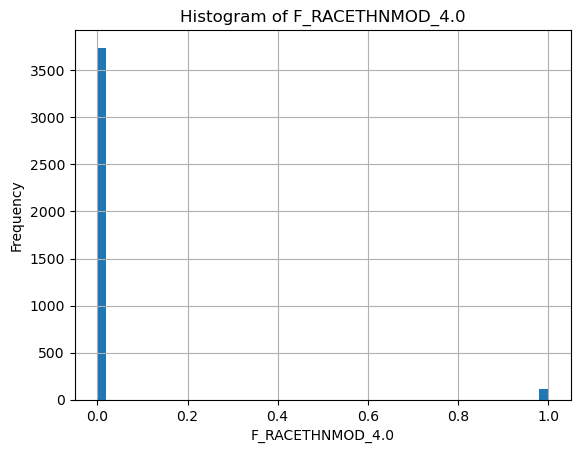

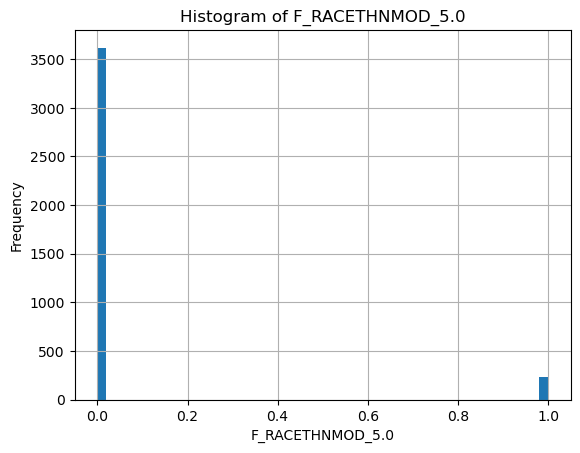

In [15]:
#Initial look at values and distributions with histograms.  Accuracy in recoding?  Imbalances? Eyeshot decent distributions for ordinal data?

for column in EV_df_original_1B:
    plt.figure()  # create a new figure
    EV_df_original_1B[column].hist(bins=50)  # create a histogram for the current column
    plt.title('Histogram of ' + column)  # set the title
    plt.xlabel(column)  # set the x-label
    plt.ylabel('Frequency')  # set the y-label

plt.show()